# Exploration 01
*Anders Poirel*

Some experimentation with data-preprocessing.

Necassary imports:

In [1]:
import tensorflow as tf
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pandas import get_dummies

In [3]:
from tensorflow.keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional

## Data loading and exploration

In [6]:
cd notebooks

c:\Users\Anders\Documents\school-work\CSE142\cse142-final-project\notebooks


In [7]:
dataset_file = open('../data/raw/data_train.json', 'r')

In [8]:
dataset = json.load(dataset_file)

In [25]:
ratings = [item['stars'] for item in dataset]
reviews =[item['text'] for item in dataset]
cool = [item['cool'] for item in dataset]
useful = [item['useful'] for item in dataset]
funny = [item['funny'] for item in dataset]

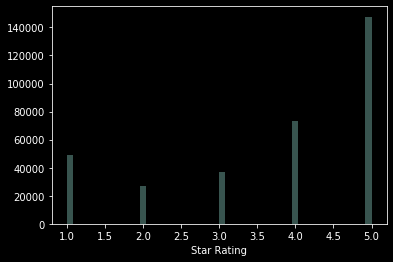

In [26]:
sns.distplot(ratings, kde = False, axlabel = 'Star Rating')

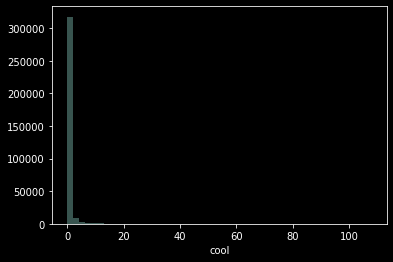

In [11]:
sns.distplot(cool, kde = False, axlabel = 'cool')

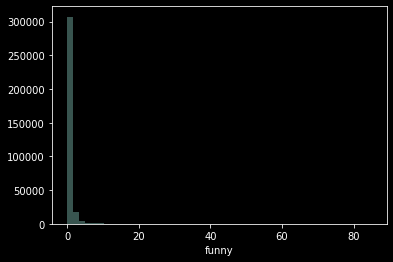

In [12]:
sns.distplot(funny, kde = False, axlabel = 'funny')

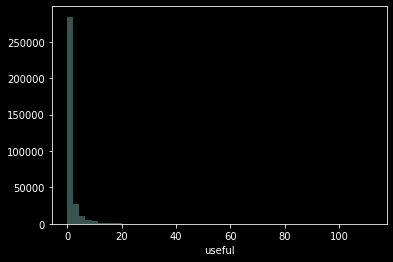

In [13]:
sns.distplot(useful, kde = False, axlabel = 'useful')

In [14]:
dataset_frame = pd.DataFrame({'rating': ratings, 'cool': cool, 'funny': funny, 'useful': useful})

In [15]:
dataset_frame['useful'].unique()

array([  6,   0,   3,   7,   5,   1,   9,   4,   2,  11,  14,   8,  10,
        23,  13,  18,  16,  12,  17,  42,  28,  22,  31,  34,  27,  20,
        32,  21,  19,  15,  61,  91,  47,  36,  38,  35,  29,  24,  30,
        33,  46,  40,  25,  55,  87,  43,  48,  71,  26,  56,  37,  45,
        41, 101,  39,  58,  53,  44,  60,  66,  75,  50,  52,  83,  76,
        67,  63,  84,  62,  54,  74,  82,  64,  59,  94,  51,  57, 112,
        72,  65,  97,  68,  49, 104,  86,  81,  88,  90,  77, 108,  93],
      dtype=int64)

In [16]:
dataset_frame['cool'].unique()

array([  0,   5,   1,   9,   4,   6,  11,   3,   2,   7,  15,  10,  26,
        22,  12,  17,  18,  25,   8,  21,  20,  59,  86,  55,  30,  13,
        23,  16,  31,  28,  14,  35,  27,  34,  38,  19,  48,  79,  33,
        49,  78,  32,  29,  37,  52,  36,  40,  41,  94,  50,  47,  51,
        24,  65,  63,  45,  77,  56,  68,  60,  42,  76,  58,  43,  54,
        53,  70,  74,  39,  64,  57,  69,  61,  91,  44,  99,  90,  62,
        72,  67,  73,  46, 108,  87,  98], dtype=int64)

In [17]:
dataset_frame['funny'].unique()

array([ 1,  0,  4,  7,  6,  2, 14,  5,  8,  3, 10,  9, 17, 12, 13, 22, 18,
       16, 42, 11, 34, 24, 15, 20, 36, 28, 23, 25, 19, 26, 37, 31, 21, 46,
       27, 35, 30, 29, 40, 33, 32, 57, 47, 58, 49, 45, 59, 44, 50, 43, 74,
       38, 39, 52, 41, 75, 48, 53, 64, 62, 51, 73, 68, 85], dtype=int64)

It seems like the `cool`, `unique` and `funny` features count the number of people who voted the review
as in one of these categories.

In [ ]:
We will want to known the lengths of the longuest reviews in our corpus to pass into our pre-processing pipeline:

In [27]:
lengths = [len(texb) for text in reviews]

In [39]:
lengths = [len(text.split()) for text in reviews]

In [28]:
lengths[0:10]

[204, 1561, 615, 407, 3509, 1547, 1274, 374, 1423, 97]

In [40]:
max(lengths)

1028

In [41]:
lengths.sort()

In [42]:
lengths[-20:-1]

[977,
 979,
 982,
 983,
 986,
 987,
 988,
 989,
 991,
 992,
 995,
 996,
 997,
 1004,
 1005,
 1008,
 1012,
 1014,
 1022]

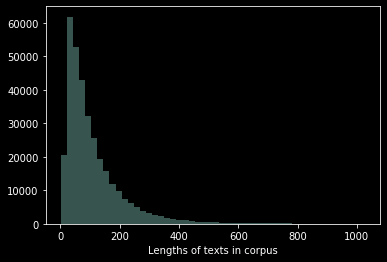

In [43]:
sns.distplot(lengths, kde = False, axlabel = 'Lengths of texts in corpus')

A maximum length of 5000 would cover everything but it seems like we could preserve most of the data with a maximum length of 2000.

## Data Pre-processing

We now put our data in a form fir for being passed into an enbedding layer in Keras

In [51]:
MAX_FEATURES = 10000
MAX_LEN = 1050

In [44]:
tokenizer = Tokenizer(MAX_FEATURES)

In [45]:
tokenizer.fit_on_texts(reviews)

In [48]:
reviews_t = tokenizer.texts_to_sequences(reviews)

In [47]:
reviews_t[0:5]

[[842,
  588,
  10,
  15,
  550,
  41,
  111,
  248,
  8847,
  279,
  23,
  1,
  4930,
  5,
  555,
  74,
  7463,
  10,
  142,
  8272,
  3,
  780,
  761,
  1,
  8272,
  73,
  31,
  23,
  10,
  2584,
  2812,
  286,
  1033,
  2084,
  20291,
  26,
  37,
  1830],
 [3,
  5173,
  7429,
  26,
  1,
  341,
  36411,
  134,
  4591,
  25091,
  758,
  88,
  91,
  4,
  523,
  7,
  4,
  35,
  8634,
  2,
  65,
  7857,
  5,
  1,
  3152,
  13,
  507,
  15,
  41,
  255,
  7429,
  87,
  687,
  1,
  5013,
  8634,
  5,
  4,
  386,
  134,
  793,
  5853,
  19,
  14,
  160,
  573,
  532,
  38946,
  11,
  160,
  1174,
  573,
  5931,
  710,
  387,
  2,
  4,
  172,
  2970,
  10040,
  7040,
  174,
  448,
  1,
  176,
  1346,
  2,
  875,
  4113,
  201,
  19,
  46,
  4,
  268,
  815,
  1947,
  13,
  109,
  6011,
  78,
  1,
  34,
  528,
  12059,
  11,
  163,
  2,
  1,
  10397,
  4113,
  205,
  7429,
  87,
  25790,
  1262,
  2356,
  11,
  4,
  29,
  133,
  2,
  304,
  1,
  264,
  535,
  7,
  1834,
  13,
  6,
  1918,
  1

In [52]:
reviews_t = tf.convert_to_tensor(pad_sequences(reviews_t, maxlen = MAX_LEN))

In [54]:
reviews_t = pd.get_dummies(reviews)

In [0]:
reviews_t = tf.convert_to_tensor(reviews_t)

In [8]:
def lstm_model(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'], num_units = 128, embedding_size = 16):
    model = tf.keras.Sequential()
    model.add(Embedding(input_dim = 10000, output_dim = embedding_size, input_length = 1050))
    model.add(Bidirectional(LSTM(num_units)))
    model.add(Dense(1, activation = 'softmax'))
    model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
    return model

In [9]:
model = lstm_model()